In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.html import widgets
%load_ext rpy2.ipython


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
import cPickle

In [4]:
sils = cPickle.load(open('../results/cluster/coact_PCA_mpfc/sil_coact.pkl', 'r')) + cPickle.load(open('../results/cluster/coact_PCA_mpfc/sil_coact_11_15.pkl', 'r'))

In [5]:
sils

[0.11077470809550023,
 0.1306418770874769,
 0.11476493199197235,
 0.1141505852488354,
 0.12525804594228479,
 0.13031563751913833,
 0.13721838414203361,
 0.14190896153039279,
 0.14079830420129735,
 0.14485545218314125,
 0.14817910397922199,
 0.14733846469817119,
 0.14537531755814281,
 0.14519274381831032]

In [6]:
sils = pd.DataFrame(sils)

In [7]:
sils.index = sils.index + 2

In [8]:
sils = sils.reset_index()

In [9]:
sils.columns = ['x', 'y']

In [10]:
sns.set_context('talk', font_scale=1, rc={"lines.linewidth": 2})
sns.set_style("ticks")
plt.figure(figsize=(4, 2.7))

g = sns.regplot('Number of clusters (k)', 'Silhouette score', sils, fit_reg=False, scatter=True)
sns.despine(offset=10, trim=True)
g.set(xticks=range(1, 16), xlim = [1.9, 15.5])

KeyError: 'Silhouette score'

In [11]:
%Rpush sils

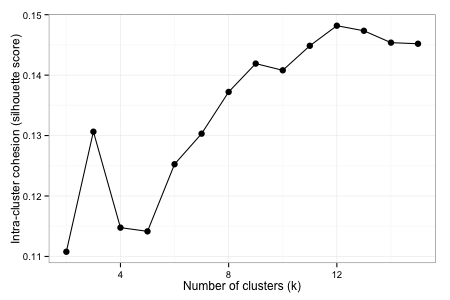

In [12]:
%%R -h 300 -w 450
library(ggplot2)
ggplot(sils, aes(x, y)) + geom_point(size = 3) + geom_line() + theme_bw() + xlab("Number of clusters (k)") + ylab("Intra-cluster cohesion (silhouette score)")
# scale_x_continuous(breaks=seq(0, 15, 1), limits=c(2, 10))